## Exemplo de treinamento de um modelo para visualizar a matriz de confusão

In [50]:
# Import das bibliotecas
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split

In [2]:
# Carregando dataset de cancer de mama
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target
y_names = cancer.target_names
feature_names = cancer.feature_names


In [3]:
# X e um ndarray com 569 linhas e 30 colunas (features)
print(X[0:5])
print(type(X))
X.shape

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

(569, 30)

In [4]:
# y e um ndarray com 150 linhas, vetor coluna. Temos 3 classes 0, 1, 2
print(y)
type(y)
y.shape

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

(569,)

In [5]:
# Nomes das classses (0, 1, benigno e maligno)
print(y_names)
# Nomes das features/ explicativas do modelo, relacionadas ao tumor, tamanho, medida, textura etc
print(feature_names)

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### Iniciando treinamento de um modelo simples

In [6]:
# Separando o dataset em conjunto de treino e test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [7]:
# Criando Modelo
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# Fazendo o predict na base de teste e o predict proba
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)

In [9]:
# Comparando y_pred com y_test
print(y_pred)
print(y_test)

[0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1]
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1]


### Analisando Resultado do modelo utilizando a matriz de confusão

Acurácia = (VP + VN)/(VP + FP + VN + FN)

Precisão = (VP)/(VP+ FP)

Recall ou Sensitividade = (VP)/(VP + FN)

Especificidade = (VN)/ (VN + FP)

In [10]:
# Plotar a matriz de confusao
conf_matrix = confusion_matrix(y_test, y_pred, labels=rf.classes_)
print(conf_matrix)

[[45  2]
 [ 3 64]]


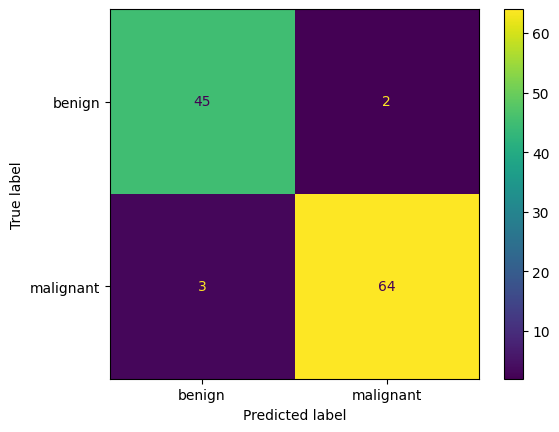

In [11]:
disp_conf = ConfusionMatrixDisplay(conf_matrix, display_labels= y_names[::-1])
disp_conf.plot()
plt.show()

In [12]:
# Acuracia
accuracy = (conf_matrix[0,0] + conf_matrix[1,1]) / np.sum(conf_matrix)
# Precisao
precision = conf_matrix[1,1] /np.sum(conf_matrix[ :, 1])
# Recall
recall = conf_matrix[1,1] /np.sum(conf_matrix[1, :])
# Espicificidade
esp  = conf_matrix[0,0] /np.sum(conf_matrix[0, :])
print("Acuracia", accuracy)
print("Precisao:", precision)
print("Recall:", recall)
print("Especificidade:", esp)

Acuracia 0.956140350877193
Precisao: 0.9696969696969697
Recall: 0.9552238805970149
Especificidade: 0.9574468085106383


In [13]:
# Agora vamos comparar com os resultado do python, nao achei especificidade implementada no sklearn
print("Acuracia python", accuracy_score(y_test, y_pred))
print("Precisao python:",  precision_score(y_test, y_pred))
print("Recall python:",  recall_score(y_test, y_pred))
print("Especificidade python: Nao tem")

Acuracia python 0.956140350877193
Precisao python: 0.9696969696969697
Recall python: 0.9552238805970149
Especificidade python: Nao tem


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        47
           1       0.97      0.96      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



### Curva ROC e Precision-Recall Curve

In [ ]:
# Para calcular a curva roc e o AUC ROC precisamos dos vetores de probabilidades estimadas pelo modelo (predict_proba)
one_menos_espc, recall, threshold = roc_curve(y_test, y_pred_proba[:, 1])

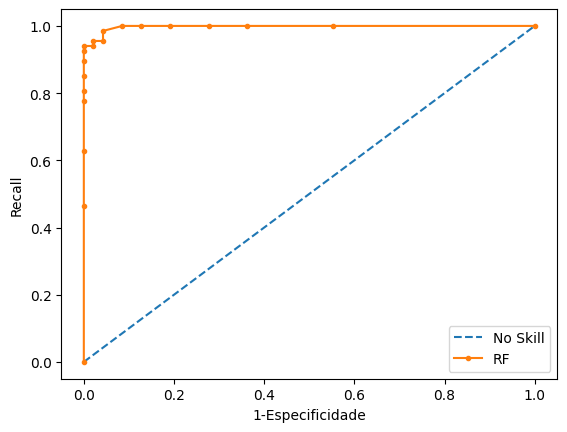

In [31]:
# Classificador dummye
plt.plot([0,1],[0,1], linestyle="--", label="No Skill")
# CURVA ROC para o Modelo RandomForest
plt.plot(one_menos_espc, recall, marker=".", label="RF")
plt.xlabel("1-Especificidade")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [34]:
# Calculando Area embaixo da curva ROC
auc_roc = roc_auc_score(y_test, y_pred_proba[:, 1])
print("Área embaixo da curva ROC:", auc_roc)

Área embaixo da curva ROC: 0.9974595109558589


In [45]:
# Precision-Recall Curve Plot of Recall (x) vs Precision (y).
precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba[:, 1])
# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)

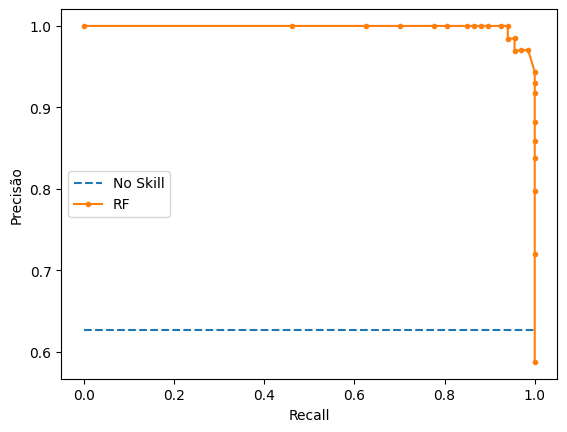

In [48]:
# Classificador dummye
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# CURVA ROC para o Modelo RandomForest
plt.plot(recall, precision, marker=".", label="RF")
plt.xlabel("Recall")
plt.ylabel("Precisão")
plt.legend()
plt.show()

In [53]:
# Calculando Area embaixo da curva Precision-Recall
auc_pr = auc(recall, precision)
print('No Skill Model:', no_skill)
print("Área embaixo da curva PR para o modelo RF:", auc_pr)

No Skill Model: 0.6274165202108963
Área embaixo da curva PR para o modelo RF: 0.9982374948074199
